1. Titanic Dataset Analyis

STEP - 1 : IMPORTING THE NECESSARY MODULES

In [1]:
#importing necessary modules

import numpy as np 
import pandas as pd 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
#reading the dataset
df = pd.read_csv("E://Datasets//Titanic-Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
#printing first 5 rows of the dataframe
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#shape of the dataset
df.shape

(891, 12)

In [5]:
#describing the dataset
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#printing the columns present
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
#printing the information about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
#checking for null values in each column
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
#mean of the age column in the dataset
df['Age'].mean()

29.69911764705882

In [10]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

<AxesSubplot:title={'center':'Survived and Non-Survived Count for Each Gender'}, xlabel='Sex', ylabel='count'>

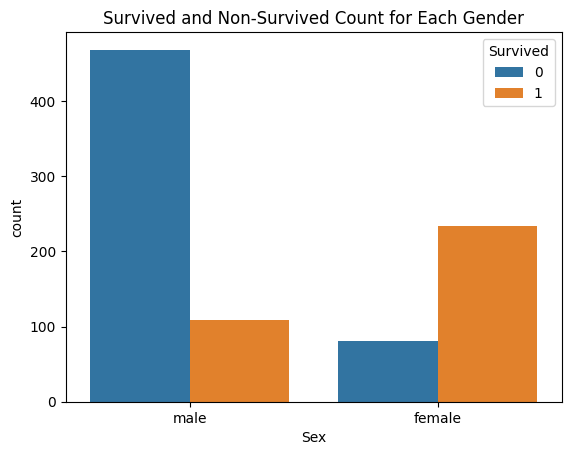

In [11]:
#Data Visualisation
# Count Plot of no of males vs no of females survived and non survived

plt.title("Survived and Non-Survived Count for Each Gender")
sns.countplot(df,x='Sex',hue='Survived')

<AxesSubplot:title={'center':'Survived and Non-Survived Count for Each Embarkment'}, xlabel='Embarked', ylabel='count'>

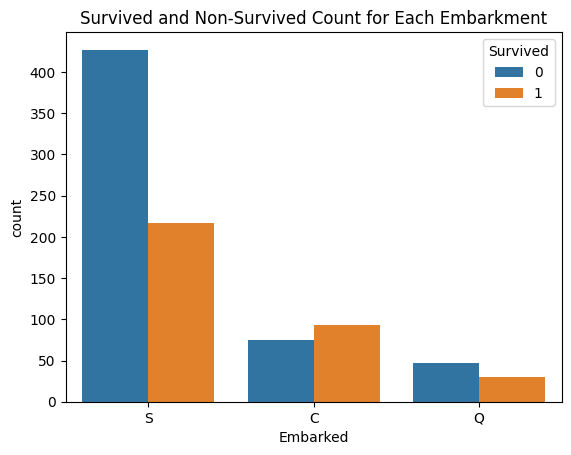

In [12]:
#similarly countplot on survived & embarked
plt.title("Survived and Non-Survived Count for Each Embarkment")
sns.countplot(data=df,x='Embarked',hue='Survived')

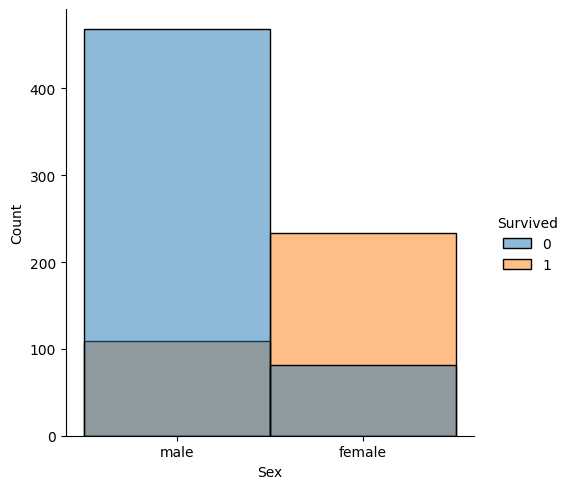

In [13]:
#displot for the same dataset
sns.displot(df,x='Sex',hue='Survived')

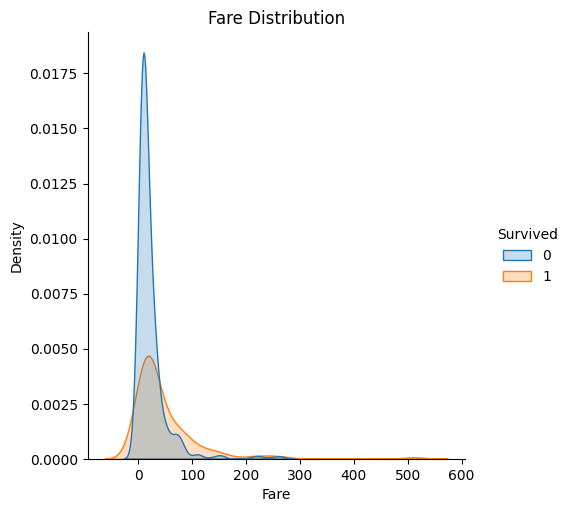

In [14]:
sns.displot(data=df, x='Fare', hue='Survived', kind='kde', fill=True)
plt.title('Fare Distribution')
plt.show()

In [15]:
#dropping unwanted columns
df2 = df.drop(columns=['PassengerId'],axis=1)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

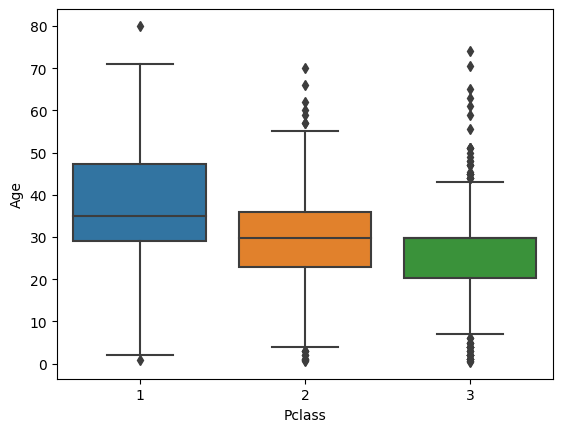

In [16]:
#boxplot on p-class vs age
sns.boxplot(data=df2,y='Age',x='Pclass')

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

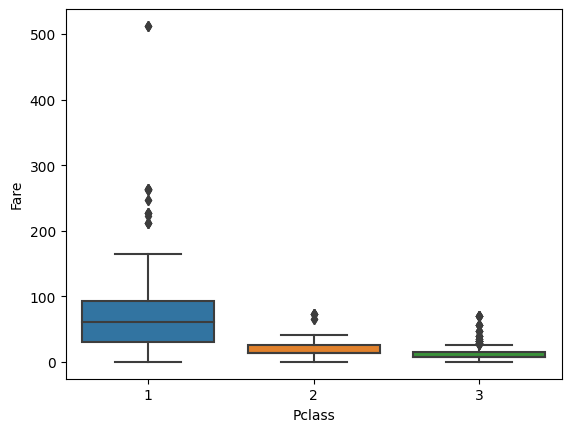

In [17]:
#similarly for p-class vs fare
sns.boxplot(data=df2,y='Fare',x='Pclass')

In [18]:
#correlation of the dataset
corr_df = df2.corr()

<AxesSubplot:>

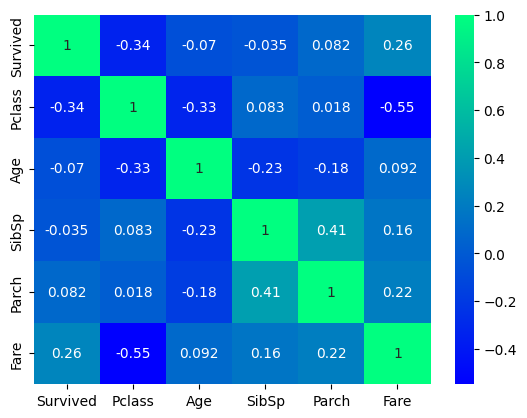

In [19]:
#heatmap of the above dataset
sns.heatmap(corr_df,cbar=True,annot=True,cmap="winter")

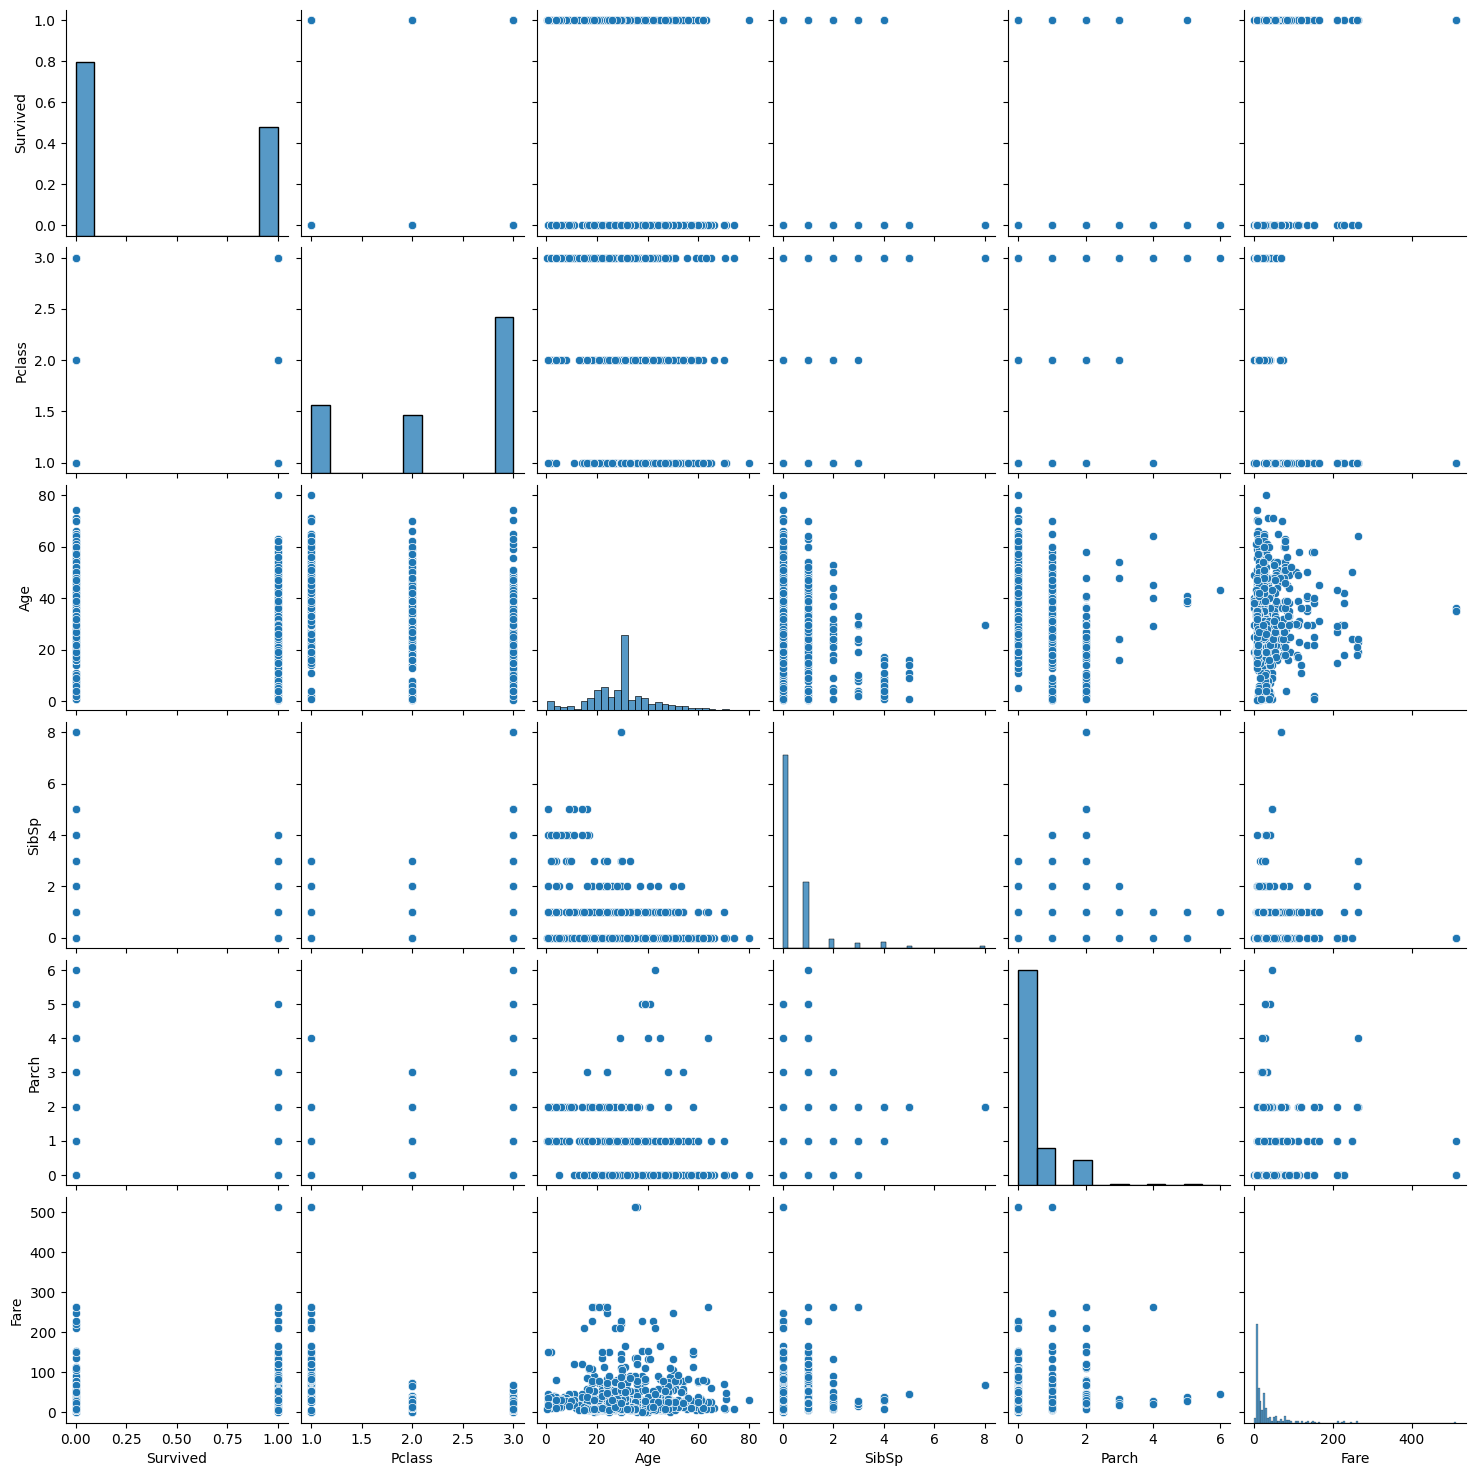

In [20]:
#visualizing pair plot on above dataset 
sns.pairplot(df2)

In [21]:
#dropping unwanted columns
df2 = df2.drop(columns = ['Name',"Cabin","Fare","Ticket"],axis=1)


In [22]:
#applying feature transformation 
le = LabelEncoder()
cols = ['Sex','Embarked']
for c in cols:
    df2[c] = le.fit_transform(df2[c])


In [23]:
#printing the new data
df2.head(6)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.000000,1,0,2
1,1,1,0,38.000000,1,0,0
2,1,3,0,26.000000,0,0,2
3,1,1,0,35.000000,1,0,2
4,0,3,1,35.000000,0,0,2
5,0,3,1,29.699118,0,0,1


In [24]:
#splitting the training data and testing data
train_df = df2.sample(frac=0.7, random_state=25)
test_df = df2.drop(train_df.index)
X = df2.drop(columns=['Survived'],axis=1)
Y = df2['Survived']
print(X.columns)
def make_classify(model):
    x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=25)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    from sklearn.metrics import accuracy_score
    print(y_pred)
    print("Accuracy score is ",accuracy_score(y_test,y_pred))
     




Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'], dtype='object')


In [25]:
#testing logistic regression
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression()
make_classify(model)

[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0
 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 1 1 0 1 1
 0 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 1 0
 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0
 0]
Accuracy score is  0.7982062780269058


In [29]:
#testing RandomForestClassifier 
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier()
make_classify(model2)

[0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 1 1 1 0 0 0 0 0 1 0 1 0 1 1 1 1 1 1
 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 1 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1
 0 1 0 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0
 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 1 0 1 1 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0
 0]
Accuracy score is  0.8026905829596412


In [27]:
#importing extratreesclassifier
from sklearn.ensemble import ExtraTreesClassifier
model3 = ExtraTreesClassifier()
make_classify(model3)

[0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 1 1 0 0 0 0 0 1 0 1 0 1 1 1 1 1 1
 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 1 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1
 0 1 0 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0
 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 1 0 1 1 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0
 0]
Accuracy score is  0.7847533632286996


In [28]:
#cat-boost classifier
from catboost import CatBoostClassifier
make_classify(CatBoostClassifier(verbose=0))

[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0
 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1
 0 1 0 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 1 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0
 0]
Accuracy score is  0.7937219730941704


Conclusion:

1. The best classification algorithm in the above dataset in RandomForest Classifier.
2. The accuracy of this model is 80% approximately.
3. The number of males survived is more than the number of females.
4. The mean age is around 30.
5. The people belonging to embarked category 'S' survived the most and has the highest count of other embarkments.